In [1]:
# If executing in Google Colab
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Run from here
import numpy as np
import pandas as pd

import csv 
import requests 
import xml.etree.ElementTree as ET 
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.text import Text

import numpy as np
import pandas as pd
import warnings
import nltk
import re
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.text import Text
import gensim
from tqdm import tqdm
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install pypyodbc

import pickle
temp = pickle.load(open("/content/drive/My Drive/New Data/data.pkl", 'rb'))

print("Necessary Imports Complete! ")

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
  Created wheel for pypyodbc: filename=pypyodbc-1.3.4-cp36-none-any.whl size=22843 sha256=f0295989974d8988d1c5e5c2647026776ac504af4d17ec51289c4679cd09bef2
  Stored in directory: /root/.cache/pip/wheels/e4/92/18/b21aa15a7e8915859a6fc10206cdd7f5d9ac098a523b9738c6
Successfully built pypyodbc
Necessary Imports Complete! 


In [3]:
import os
import pypyodbc

loc = '/content/drive/My Drive/New Data/Fulldocs-new'
os.chdir(loc)
filelist = os.listdir()
#print (len((pd.concat([pd.read_csv(item, names=[item[:-4]]) for item in filelist],axis=1))))

data = []
path = loc
files = [f for f in os.listdir(path) if os.path.isfile(f)]
for f in files:
    with open(f,'r') as myfile:
        data.append(myfile.read())
        
df = pd.DataFrame(data)
print (df.shape)

(50, 1)


In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

#stopwrds = set(stopwords.words('english')) 
stopwrds = (stopwords.words('english')) 

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^\.a-zA-Z]", " ", newString)  ### to modify to include full stops
    
    tokens = [w for w in newString.split() if not w in stopwrds]
    long_words=[]
    for i in tokens:
        if len(i)>=1:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

data_pickle_np = np.array(temp)

cleaned_full_sent = []
for t in tqdm(data_pickle_np[:500,1]):
    cleaned_full_sent.append(text_cleaner(t))

cleaned_summ_sent = []
for t in tqdm(data_pickle_np[:500,0]):
    cleaned_summ_sent.append(text_cleaner(t))

test_pickle_np = np.array(df)
test_sent = []
for t in tqdm(test_pickle_np[:50,0]):
    test_sent.append(text_cleaner(t))

100%|██████████| 50/50 [00:00<00:00, 88.75it/s]


In [5]:
# Sentence tokenization and tagging of document number t sentences

# temp = data_
set = len(cleaned_summ_sent)
# set = np.arange(0, 51, 1)
# set = [0, 1, 2]

full_sent = pd.DataFrame()
summ_sent = pd.DataFrame()

full_docs = []
summ_docs = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(set):
    full = cleaned_full_sent[i]
    summary = cleaned_summ_sent[i]

    v = sent_tokenize(full)    
    # t1 = pd.DataFrame(v)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t1 = pd.DataFrame(v1)


    v = sent_tokenize(summary)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t2 = pd.DataFrame(v1)

    t3 = np.linspace(i, i, num = len(t1))
    t4 = np.linspace(i, i, num = len(t2))

    full_docs = np.append(full_docs, t3)
    summ_docs = np.append(summ_docs, t4)

    full_sent = pd.concat([full_sent, t1], ignore_index = True)
    summ_sent = pd.concat([summ_sent, t2], ignore_index = True)
    # print(t1)
    print(i)
# -----------------------------------------------------------------------------------------------------------------------------

#print('summary sentence tokenization')
#print(len(summ_docs))
print(len(summ_sent))
#print(len(full_docs))
print(len(full_sent))

# summ_sent_mod = summ_sent.set_axis(['Sentences'], axis=1, inplace=False)
# full_sent_mod = full_sent.set_axis(['Sentences'], axis=1, inplace=False)

# -----------------------------------------------------------------------------------------------------------------------------

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
set = len(test_sent)
gs_sent = pd.DataFrame()
gs_docs = []

for i in range(set):
    test_s = test_sent[i]

    v = sent_tokenize(test_s)    
    # t1 = pd.DataFrame(v)
    v1 = []
    for b in v:
      if len(b)>20:
        v1.append(b)
    t1 = pd.DataFrame(v1)

    t3 = np.linspace(i, i, num = len(t1))

    gs_docs = np.append(gs_docs, t3)

    gs_sent = pd.concat([gs_sent, t1], ignore_index = True)
    
    # print(t1)
    #print(i)
# -----------------------------------------------------------------------------------------------------------------------------

#print('summary sentence tokenization')
#print(len(summ_docs))
print(len(gs_sent))


9092


In [7]:
print(len(summ_docs))
print(len(summ_sent))
print(len(full_docs))
print(len(full_sent))
print(len(gs_docs))
print(len(gs_sent))

13690
13690
63071
63071
9092
9092


In [8]:
combined = pd.DataFrame()

tmp1 = pd.DataFrame(summ_sent)
tmp1.columns = ['Sentences']

tmp2 = pd.DataFrame(full_sent)
tmp2.columns = ['Sentences']

tmp3 = pd.DataFrame(gs_sent)
tmp3.columns = ['Sentences']

combined = pd.concat([tmp1, tmp2], axis = 0, ignore_index=True, sort = False)
combined = pd.concat([combined, tmp3], axis = 0, ignore_index=True, sort = False)
combined.sample(10)

,Sentences
14557,secondly arriving conclusion high court greatl...
9187,period involved appeal .
53096,industrial dispute thereupon arose appellants ...
34614,v. federal trade commission cca.
61470,context das c. j. collected hindu law texts ri...
84250,receipt aforesaid message pw along asi tabit m...
56914,writ petitions challenge section act no.
16330,lordships observed would dangerous power place...
27171,decree challenged respondents preferring secon...
64130,therefore entitled benefits onwards.


In [20]:
combined.shape

(85853, 1)

In [9]:
tmp3['doc_id'] = gs_docs
tmp3.shape

(9092, 2)

In [0]:
tmp3.to_pickle("/content/drive/My Drive/BERT/Data Produced/gs_sent.pickle")
# gs_docs.to_pickle("/content/drive/My Drive/Word2Vec_Modelling_Srijan/Data Produced/gs_doc.pickle")

In [14]:
!pip install -U sentence-transformers

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 645kB 8.8MB/s 
     |████████████████████████████████| 1.1MB 12.5MB/s 
     |████████████████████████████████| 3.8MB 28.8MB/s 
     |████████████████████████████████| 890kB 43.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=406d4f31a79482e4710b026099c34c7ec70e86e1f467a84afdde295f064e10e0
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=b536ccf510801d1e37aa311fbfe1dd0cb4407fd47ff91a5af77822d77f3295d4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [32]:
len((np.array(combined)).reshape(85853,))

85853

In [55]:
from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')


sentence_embeddings = model.encode(((np.array(combined)).reshape(len(combined),)))

100%|██████████| 1.31G/1.31G [01:06<00:00, 19.6MB/s]


In [56]:
x2 = pd.DataFrame(sentence_embeddings)
x2.shape

(85853, 1024)

In [0]:
n_size = 500

x2.to_pickle("/content/drive/My Drive/BERT/Data Produced/RoBERTa_embeddings_500_docs.pickle")

In [58]:
# x2 = pd.DataFrame(temp)

print(x2.shape)


summ_tfidf = x2.iloc[:len(summ_sent),:]
full_tfidf = x2.iloc[len(summ_sent):len(summ_sent)+len(full_sent),:]
gs_tfidf = x2.iloc[len(summ_sent)+len(full_sent):,:]

(85853, 1024)


In [59]:
summ_tfidf['doc_id'] = summ_docs
full_tfidf['doc_id'] = full_docs
gs_tfidf['doc_id'] = gs_docs
summ_tfidf.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,doc_id
13685,0.340806,-0.204842,-0.364225,0.156756,-0.939400,0.371985,0.519989,1.142336,0.204403,0.357170,-0.300988,1.987594,0.176255,0.202508,0.305983,0.519010,-0.441240,0.115437,-0.063159,1.103532,0.637730,1.364950,1.046033,-0.025785,1.665341,0.307417,0.924116,-0.058120,-0.457507,-1.887449,0.190259,-0.360470,0.249647,0.611430,0.463971,-2.059806,0.609491,0.035338,-0.507263,-0.805922,...,-1.414013,-0.070553,-0.482575,0.205381,-0.007896,0.090917,-0.291414,1.090881,-1.221322,1.283208,-0.893185,-0.436580,0.394142,-0.098393,-0.345266,0.657865,-1.376411,-0.667303,0.307194,-1.357280,-0.988427,-0.922949,-0.989077,0.694177,0.933706,-0.060760,0.126992,0.399672,0.672535,-1.481469,0.244684,-0.705974,-0.825259,-1.285335,0.053163,1.334745,-0.851602,-1.612429,1.282708,499.0
13686,1.078422,-0.346003,-0.277073,-0.075012,0.231293,0.525073,-0.811377,0.048593,-0.424439,0.432734,-0.279122,1.312299,0.504857,0.302218,-0.219099,1.114841,0.153362,-0.081285,0.084943,-0.003968,-0.312701,0.791901,1.047384,0.085786,0.799020,0.704649,0.386088,0.746932,0.779051,-0.110762,0.657258,0.802069,0.593722,-0.044574,0.850621,0.629167,-1.829194,1.078801,-0.097139,-0.079749,...,-0.020680,-0.231404,-0.122626,1.280970,-0.278689,-0.300705,-0.130042,0.865023,-0.475985,0.437146,-1.582846,-0.177636,-0.627431,-0.292592,-0.185218,0.011658,-0.792320,-0.599347,0.802223,0.210414,-2.033678,-1.164140,-0.820645,0.382692,-0.246419,-1.152180,0.286932,0.312796,1.025488,0.536630,-0.449808,-0.756785,0.956610,-0.012200,0.422569,-0.106056,-0.349887,-1.418385,1.461555,499.0
13687,0.398310,0.346707,0.081295,0.474268,0.859067,-0.354350,-0.279641,-0.834487,0.324449,1.116692,-1.117085,-0.444871,0.497847,0.724198,-0.962318,0.212819,0.705675,0.998845,-0.566936,-1.623339,-0.227252,-0.637153,0.820298,-0.729140,0.958133,0.275928,-0.569790,0.529450,1.203410,-1.585126,0.413337,0.595451,0.222217,0.794516,-0.612970,1.719536,-0.528329,-0.531150,-0.775011,1.034513,...,1.516008,0.767285,-0.000820,0.572731,0.823705,0.354134,-0.208813,-1.042621,-0.565284,-0.360409,-1.698617,-0.411768,1.367859,-0.407170,-0.433405,-0.480381,-0.555619,-2.759120,-0.005322,1.310865,-0.796173,0.876263,-0.717648,1.564457,-0.325395,0.589101,0.684941,-0.662019,0.926797,-0.241092,-0.137887,0.249217,-0.939381,0.735821,1.300139,-0.154841,-0.072119,-0.697990,-0.032116,499.0
13688,0.448646,-1.231008,-0.464515,0.196788,-0.699087,-0.293393,-1.012860,-0.435551,-0.656522,0.049776,-2.168936,-0.315946,-0.150397,-0.723701,0.549447,0.636153,-0.656346,0.262285,-0.687445,0.851927,-1.021765,1.132813,0.305679,0.235607,0.571054,-1.271871,-0.237148,0.512487,0.552244,-1.283120,-0.667830,0.840371,-0.059804,-0.363289,0.033536,-1.591795,0.135540,-0.102070,0.098581,0.183996,...,-0.518327,0.597471,-0.041454,0.834630,1.670334,-0.530033,-0.020062,0.106789,0.296585,0.260391,-0.356628,0.545381,-0.306691,-0.518800,0.519672,-0.072354,-0.695321,-0.109229,0.218771,-0.439885,-1.155276,0.865820,1.052830,0.837595,0.348489,0.165577,-0.730685,0.363919,0.752525,-0.155898,-0.339589,-0.548096,-0.422693,0.204825,1.737721,1.063210,-0.071208,-1.312580,0.151716,499.0
13689,-0.446281,-0.079327,-0.488997,0.381863,-1.126931,-0.409209,0.122946,-1.098628,-0.441830,-0.241913,-0.445831,-0.802318,-1.039813,-0.382805,1.466139,-1.091694,-0.945740,-0.947893,-0.743553,0.969935,-1.327919,-0.583813,0.808121,-1.221723,-1.509566,-1.199501,-0.472659,-0.352447,-0.502809,-1.556424,-1.099108,0.640410,-0.037695,0.901080,0.974677,-0.805488,1.341816,-0.697001,-0.486938,-0.112519,...,-0.620069,-0.775313,-0.520594,-0.183176,0.983719,0.371983,0.746988,-0.425808,-0.453243,0.647923,-0.921744,-0.735980,0.688070,-0.776743,0.159820,0.471890,0.456086,-0.867812,1.239543,-1.151447,0.163907,0.415814,-0.822487,0.656281,-1

In [60]:
gs_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,doc_id
76761,-0.033473,-0.013980,-0.828544,0.460304,0.602630,-0.000117,0.268227,-1.072058,-0.329479,0.329365,-0.596431,-1.485554,0.786354,0.306211,-0.745997,-0.533037,-0.483984,0.383075,-0.173824,0.072295,-0.018968,1.416615,0.386645,-0.940006,0.992418,-0.642909,-0.553521,-0.223198,-0.121408,-0.787485,-0.702615,-0.119934,0.517838,1.458107,-1.599721,-0.205908,-0.533182,-0.121723,0.103870,0.802792,...,-0.970843,-0.839686,1.409261,0.029783,0.724266,0.354670,1.284006,-0.914893,0.970906,0.687858,-1.980511,-0.478451,1.244364,-1.218108,0.847322,0.461018,-1.998211,0.568987,1.884178,0.048822,-0.653116,-0.906447,-0.714096,0.345054,0.382883,0.337420,-0.054927,-1.379399,-0.489914,-0.677842,0.488557,0.718219,-1.222067,-0.089745,0.743043,1.529895,0.386023,-1.924959,-0.498317,0.0
76762,0.097803,0.776189,-1.039793,0.212036,-0.466436,-0.293703,0.690654,-2.406161,-0.121484,0.431909,-0.475662,1.036507,-0.923564,0.397269,0.185694,-1.076967,0.493711,0.545640,-0.228361,-1.647457,-0.486129,2.303057,2.125743,-1.089680,0.691365,-0.457483,-0.760942,1.015417,-0.224249,-1.536549,-1.340830,1.434457,0.015671,0.497007,-1.032725,1.333552,0.161057,-0.565655,0.550004,-0.069115,...,-0.091745,-0.253977,1.266878,-0.192662,0.601463,-0.491348,1.025373,-0.932162,0.300265,0.847376,-0.825931,-1.435825,1.696172,-1.252281,-0.776971,0.171840,-1.885670,-0.719725,2.155051,-0.488442,-1.091820,0.838652,-0.914935,0.958317,-0.545862,1.824391,-0.663846,-0.529077,0.567148,0.050929,0.620496,0.622795,-0.595578,0.472766,1.291711,1.006066,-0.140420,-1.135992,-0.036819,0.0
76763,0.380575,0.573254,-1.123794,-0.556975,0.430214,-0.027250,0.800733,-0.142487,0.610208,-0.372389,0.117396,0.052457,-1.674064,0.874718,0.802352,-2.210522,-1.891904,-0.696796,0.711675,-0.039770,0.182438,-0.568376,-1.478000,-0.861952,-1.147250,-0.361421,-0.310626,-0.347424,0.566193,-2.026136,0.393770,1.485423,-0.693691,0.378676,-0.981647,-1.400865,0.233519,-0.952793,0.013769,0.063887,...,1.035932,0.237838,1.030798,-0.707813,0.684991,1.545393,-1.609253,-0.096238,-0.343092,1.058745,-0.357962,-1.619163,-0.027042,-0.482623,-0.416578,1.687782,0.048068,0.385168,0.027323,0.419846,-0.440211,0.229469,0.311631,0.593865,-0.386194,-0.329178,-0.588677,0.063846,-0.203673,-1.043978,0.173400,-1.192303,-2.089194,0.025341,1.434548,0.924584,-0.070570,-2.235421,-0.377012,0.0
76764,-0.259284,0.328463,-0.690452,-0.742823,0.753036,0.072520,0.156478,-0.273385,-0.136603,1.385971,-1.107031,0.647390,-1.126707,0.300724,-0.887732,-2.021835,0.328446,0.556793,-0.197454,-1.179601,-0.926828,0.570820,0.243762,-0.870724,-0.464861,-1.039118,-1.258286,-0.679612,0.854858,-1.733914,0.079300,1.789307,-1.244772,1.094413,-0.330140,0.547705,0.717277,0.523961,0.794338,0.923660,...,0.503380,-0.377462,0.652023,0.563186,0.487800,-0.325936,-0.258787,-1.551570,-1.277401,2.568771,-1.776224,-1.137664,0.714913,-0.548427,-1.333738,1.136252,-1.918557,-2.135155,0.774387,-0.118709,-0.796331,0.989115,-0.370132,2.093643,-0.196835,1.203598,1.135576,-0.160507,1.090957,-0.215780,0.022303,-0.269744,-0.289758,0.471514,2.443634,1.114424,0.263260,-1.666433,-0.617062,0.0
76765,0.645423,0.259954,-0.983774,-1.314291,0.436107,-0.885891,0.264545,0.416531,1.011972,-0.617504,-0.752040,0.397477,0.659691,1.157585,-0.111666,-0.483159,0.742798,0.983543,0.978187,0.301762,0.123199,0.396277,-0.268198,1.120724,-1.076559,0.374553,-0.310662,-1.249436,-0.099561,-2.617019,0.479619,-0.167570,-0.578692,0.441655,0.400638,-0.192110,1.280277,-0.264056,0.964384,-0.851479,...,0.125828,-0.428083,0.716961,-0.845098,0.426151,0.506656,-0.104908,-1.351360,-1.449657,-0.141220,-1.497117,0.169363,-0.267551,0.664512,-1.338093,0.945803,-1.095106,-1.111571,1.207153,0.816195,-0.795717,0.221041,-0.132939,0.371168,-0.038531,0.08

In [61]:
from sklearn import preprocessing

# -----------------------------------------------------------------------------------------------------------------------------

summ_tfidf_normalized = preprocessing.normalize(summ_tfidf.drop(['doc_id'], axis=1), norm='l2')
summ_tfidf_normalized = pd.DataFrame(summ_tfidf_normalized)
summ_tfidf_normalized.columns = summ_tfidf.drop(['doc_id'], axis=1).columns
summ_tfidf_normalized['doc_id'] = np.array(summ_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------

full_tfidf_normalized = preprocessing.normalize(full_tfidf.drop(['doc_id'], axis=1), norm='l2')
full_tfidf_normalized = pd.DataFrame(full_tfidf_normalized)
full_tfidf_normalized.columns = full_tfidf.drop(['doc_id'], axis=1).columns
full_tfidf_normalized['doc_id'] = np.array(full_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------
gs_tfidf_normalized = preprocessing.normalize(gs_tfidf.drop(['doc_id'], axis=1), norm='l2')
gs_tfidf_normalized = pd.DataFrame(gs_tfidf_normalized)
gs_tfidf_normalized.columns = gs_tfidf.drop(['doc_id'], axis=1).columns
gs_tfidf_normalized['doc_id'] = np.array(gs_tfidf.doc_id)



gs_tfidf_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,doc_id
0,-0.001227,-0.000512,-0.030366,0.016870,0.022086,-0.000004,0.009830,-0.039290,-0.012075,0.012071,-0.021859,-0.054445,0.028820,0.011223,-0.027340,-0.019536,-0.017738,0.014040,-0.006371,0.002650,-0.000695,0.051918,0.014170,-0.034451,0.036372,-0.023562,-0.020286,-0.008180,-0.004450,-0.028861,-0.025751,-0.004396,0.018979,0.053439,-0.058629,-0.007546,-0.019541,-0.004461,0.003807,0.029422,...,-0.035581,-0.030774,0.051649,0.001092,0.026544,0.012999,0.047058,-0.033530,0.035583,0.025210,-0.072585,-0.017535,0.045605,-0.044643,0.031054,0.016896,-0.073234,0.020853,0.069054,0.001789,-0.023936,-0.033221,-0.026171,0.012646,0.014033,0.012366,-0.002013,-0.050554,-0.017955,-0.024843,0.017905,0.026322,-0.044788,-0.003289,0.027232,0.056070,0.014148,-0.070549,-0.018263,0.0
1,0.003419,0.027133,-0.036348,0.007412,-0.016305,-0.010267,0.024143,-0.084112,-0.004247,0.015098,-0.016628,0.036233,-0.032285,0.013887,0.006491,-0.037648,0.017259,0.019074,-0.007983,-0.057590,-0.016994,0.080508,0.074310,-0.038092,0.024168,-0.015992,-0.026600,0.035496,-0.007839,-0.053713,-0.046871,0.050144,0.000548,0.017374,-0.036101,0.046617,0.005630,-0.019774,0.019227,-0.002416,...,-0.003207,-0.008878,0.044286,-0.006735,0.021025,-0.017176,0.035844,-0.032586,0.010496,0.029622,-0.028872,-0.050192,0.059293,-0.043776,-0.027161,0.006007,-0.065917,-0.025159,0.075334,-0.017075,-0.038167,0.029317,-0.031983,0.033500,-0.019082,0.063775,-0.023206,-0.018495,0.019826,0.001780,0.021691,0.021771,-0.020820,0.016527,0.045154,0.035169,-0.004909,-0.039711,-0.001287,0.0
2,0.013404,0.020190,-0.039581,-0.019617,0.015153,-0.000960,0.028202,-0.005018,0.021492,-0.013116,0.004135,0.001848,-0.058962,0.030808,0.028260,-0.077856,-0.066634,-0.024542,0.025066,-0.001401,0.006426,-0.020019,-0.052056,-0.030359,-0.040407,-0.012730,-0.010940,-0.012237,0.019942,-0.071362,0.013869,0.052318,-0.024432,0.013337,-0.034574,-0.049340,0.008225,-0.033558,0.000485,0.002250,...,0.036486,0.008377,0.036306,-0.024930,0.024126,0.054430,-0.056679,-0.003390,-0.012084,0.037290,-0.012608,-0.057028,-0.000952,-0.016998,-0.014672,0.059445,0.001693,0.013566,0.000962,0.014787,-0.015505,0.008082,0.010976,0.020916,-0.013602,-0.011594,-0.020734,0.002249,-0.007174,-0.036770,0.006107,-0.041994,-0.073583,0.000893,0.050526,0.032565,-0.002486,-0.078733,-0.013279,0.0
3,-0.009338,0.011830,-0.024867,-0.026753,0.027120,0.002612,0.005636,-0.009846,-0.004920,0.049916,-0.039870,0.023316,-0.040578,0.010831,-0.031972,-0.072816,0.011829,0.020053,-0.007111,-0.042483,-0.033380,0.020558,0.008779,-0.031359,-0.016742,-0.037424,-0.045317,-0.024476,0.030788,-0.062447,0.002856,0.064442,-0.044830,0.039415,-0.011890,0.019725,0.025833,0.018870,0.028608,0.033265,...,0.018129,-0.013594,0.023483,0.020283,0.017568,-0.011739,-0.009320,-0.055880,-0.046005,0.092514,-0.063970,-0.040973,0.025747,-0.019751,-0.048034,0.040922,-0.069097,-0.076897,0.027889,-0.004275,-0.028680,0.035623,-0.013330,0.075402,-0.007089,0.043347,0.040898,-0.005781,0.039291,-0.007771,0.000803,-0.009715,-0.010436,0.016982,0.088007,0.040136,0.009481,-0.060016,-0.022223,0.0
4,0.024537,0.009883,-0.037400,-0.049966,0.016580,-0.033679,0.010057,0.015835,0.038472,-0.023476,-0.028590,0.015111,0.025080,0.044008,-0.004245,-0.018368,0.028239,0.037392,0.037188,0.011472,0.004684,0.015065,-0.010196,0.042607,-0.040928,0.014239,-0.011811,-0.047500,-0.003785,-0.099492,0.018234,-0.006371,-0.022000,0.016790,0.015231,-0.007303,0.048673,-0.010039,0.036663,-0.032371,...,0.004784,-0.016274,0.027257,-0.032128,0.016201,0.019262,-0.003988,-0.051375,-0.055112,-0.005369,-0.056916,0.006439,-0.010172,0.025263,-0.050871,0.035957,-0.041633,-0.042259,0.045893,0.031029,-0.030251,0.008403,-0.005054,0.014111,-0.001465,0.003082,0.011421,-0.005

In [62]:
cosine_vec = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(0,4946):
  tmp_full_sent = summ_tfidf_normalized[summ_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)
  tmp_summ_sent = full_tfidf_normalized[full_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)

  M = tmp_summ_sent.dot(np.transpose(tmp_full_sent))
  cos_doc = (np.amax(M, axis = 1))
  cosine_vec = np.append(cosine_vec, cos_doc)

# -----------------------------------------------------------------------------------------------------------------------------

len(cosine_vec)

63071

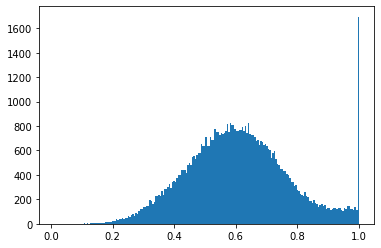

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------------------------------------------------------

plt.hist(cosine_vec, bins=200)
plt.show()

In [53]:
imp = np.copy(cosine_vec)

# -----------------------------------------------------------------------------------------------------------------------------

for i in range(len(imp)):
  if(imp[i]>=0.83):
    imp[i] = 1
  else:
    imp[i] = 0

# -----------------------------------------------------------------------------------------------------------------------------

full_tfidf_normalized['importance'] = imp
full_tfidf_normalized['importance'].value_counts()

0.0    47196
1.0    15875
Name: importance, dtype: int64

In [0]:
full_tfidf_normalized.to_pickle("/content/drive/My Drive/BERT/Data Produced/bert_train_embed_500_docs.pickle")
gs_tfidf_normalized.to_pickle("/content/drive/My Drive/BERT/Data Produced/bert_gs_embed_all.pickle")